In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    average_precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    cohen_kappa_score,
    confusion_matrix,
    plot_confusion_matrix,
    classification_report
)

In [6]:
# Import data
df_train = pd.read_csv("Fraud_sampledtrain_4.csv")
df_test = pd.read_csv("Fraud_test_4.csv")
df_val = pd.read_csv("Fraud_val_4.csv")

# df_train = pd.read_csv("Fraud_train.csv")
# df_test = pd.read_csv("Fraud_test.csv")
# df_val = pd.read_csv("Fraud_val.csv")

df_train

,Unnamed: 0,MonthOfAccident,WeekOfMonthOfAccident,MonthClaimed,WeekOfMonthClaimed,AgeOfPolicyHolder,RepNumber,Deductible,DriverRating,PoliceReportFiled,...,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeRangeOfPolicyHolder,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy,FraudFound_P
0,0,1.616388,-1.388694,1.625847,-0.548153,-1.295018,1.418479,-0.174155,0.453743,-0.171366,...,2.0,2.000000,4.000000,3.000000,0.0,2.000000,0.0,0.0,2.000000,0
1,1,-0.684689,-1.388694,-0.678112,-1.341479,-0.971229,-0.967586,-0.174155,0.453743,-0.171366,...,2.0,0.000000,5.000000,4.000000,0.0,3.000000,0.0,0.0,1.000000,0
2,2,-0.972324,0.947134,-0.966107,1.038500,1.052449,0.116989,-0.174155,0.453743,-0.171366,...,0.0,1.000000,7.000000,6.000000,0.0,1.000000,0.0,0.0,1.000000,0
3,3,0.465849,-0.610084,0.761863,1.038500,-1.295018,-1.618330,-0.174155,-1.329373,-0.171366,...,2.0,2.000000,4.000000,3.000000,0.0,0.000000,4.0,1.0,2.000000,0
4,4,-1.547593,1.725744,-1.542097,1.831826,-0.404599,0.333904,-0.174155,1.345301,-0.171366,...,2.0,1.000000,5.000000,4.000000,0.0,0.000000,0.0,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16472,16472,-0.267215,-0.823655,-0.051117,-1.123871,0.360465,-0.316841,-0.174155,-1.329373,-0.171366,...,2.0,0.725702,7.000000,5.000000,0.0,1.548596,0.0,0.0,0.274298,1
16473,16473,0.181831,-1.388694,0.189493,-0.280386,0.218709,0.195657,-0.174155,0.754665,-0.171366,...,2.0,0.000000,7.000000,5.337524,0.0,0.662476,0.0,0.0,0.000000,1
16474,16474,-0.761257,-0.402819,-0.678112,1.038500,0.938896,0.333904,-0.174155,1.345301,-0.171366,...,2.0,2.000000,7.000000,6.133099,0.0,0.866901,0.0,0.0,0.866901,1
16475,16475,0.071662,-0.855173,0.177857,-0.548153,-0.487800,-0.688428,-0.174155,1.345301,-0.171366,...,2.0,1.000000,4.342611,4.000000,0.0,3.000000,0.0,0.0,0.000000,1


In [7]:
X_train = df_train.drop(columns=['Unnamed: 0', 'FraudFound_P'])
y_train = df_train['FraudFound_P']

X_test = df_test.drop(columns=['Unnamed: 0', 'FraudFound_P'])
y_test = df_test['FraudFound_P']

X_val = df_val.drop(columns=['Unnamed: 0', 'FraudFound_P'])
y_val = df_val['FraudFound_P']

# 4. Modelling & Evaluation

## 4.1. Supervised Learning

### 4.1.1. KNN (K-Nearest Neighbors)

In [59]:
from sklearn.neighbors import KNeighborsClassifier

# K-fold cross validation for different n_neighbors
for i in range (1, 21):
    knn = KNeighborsClassifier(n_neighbors = i)
    model_knn = knn.fit(X_train, y_train)
    y_test_pred_knn = model_knn.predict(X_test)
    scores = accuracy_score(y_test, y_test_pred_knn)
    print(i, ":", scores)

1 : 0.7753250397530633
2 : 0.7993639509868113
3 : 0.7041436722476849
4 : 0.7249088017959031
5 : 0.6625198765316621
6 : 0.6797306145355907
7 : 0.6266953512300065
8 : 0.639603404732953
9 : 0.5905902160695913
10 : 0.6054625385838556
11 : 0.5612197175194088
12 : 0.5739406977831821
13 : 0.5359648302310355
14 : 0.5484987372556356
15 : 0.5128612851931531
16 : 0.5259564119352726
17 : 0.4928444486016275
18 : 0.5058460387241606
19 : 0.4796557852399214
20 : 0.49162847254700215


In [60]:
# Build the model
KNN = KNeighborsClassifier(n_neighbors = 2)
model_KNN = KNN.fit(X_train, y_train)

# Using the model to predict the results based on the test dataset
y_test_pred_KNN = model_KNN.predict(X_test)

Evaluate:

In [61]:
confusion_matrix(y_test, y_test_pred_KNN)

array([[7909, 2145],
       [   0,  637]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


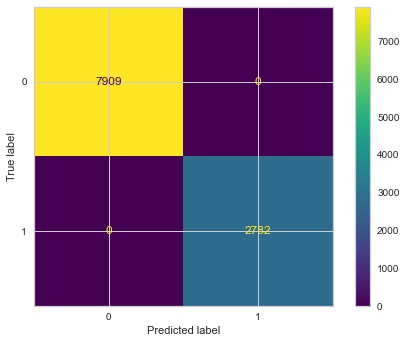

In [72]:
plot_confusion_matrix(KNN, X_test, y_test_pred_KNN)

In [63]:
print(classification_report(y_test, y_test_pred_KNN, target_names=['0','1'], digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.7867    0.8806     10054
           1     0.2290    1.0000    0.3726       637

    accuracy                         0.7994     10691
   macro avg     0.6145    0.8933    0.6266     10691
weighted avg     0.9541    0.7994    0.8503     10691



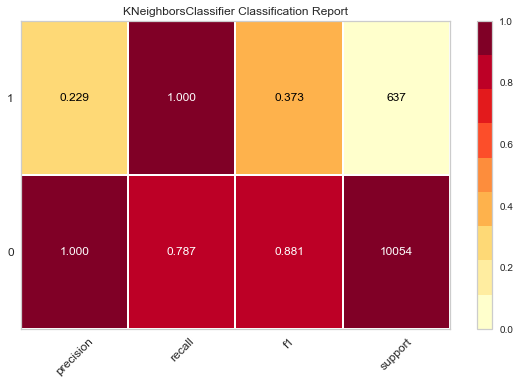

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [68]:
#pip install yellowbrick
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(KNN, classes=['0','1'], support=True, is_fitted=True)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

### 4.1.2. ANN (Artificial Neural Network)

In [65]:
from sklearn.neural_network import MLPClassifier

# Cross-validate with different size of one hidden layer
for i in range (2, 21):    
    model_ANN1 = MLPClassifier(hidden_layer_sizes=(i), max_iter=1000, random_state=0)
    scores = cross_val_score(estimator=model_ANN1, X=X_train, y=y_train, cv=5)
    print(i, ":", np.average(scores))

2 : 0.8672089588520413
3 : 0.8545239735109094
4 : 0.8678767108151509
5 : 0.8592584564727375
6 : 0.8742496169541966
7 : 0.8798939441931729
8 : 0.8929418470173992
9 : 0.8921532146382427
10 : 0.9044738460745171
11 : 0.8938524647524199
12 : 0.8994963315998055
13 : 0.8979186801125566
14 : 0.9105420650588565
15 : 0.9046555534275234
16 : 0.9079334863061126
17 : 0.9155797435066371
18 : 0.9147905218262447
19 : 0.910967503719964
20 : 0.915883307305862


In [66]:
# Cross-validate with different size of two hidden layer
for i in range (2, 21):    
    model_ANN2 = MLPClassifier(hidden_layer_sizes=(i,i), max_iter=1000, random_state=0)
    scores = cross_val_score(estimator=model_ANN2, X=X_train, y=y_train, cv=5)
    print(i, ":", np.average(scores))

2 : 0.6096376902338052
3 : 0.8514289450034621
4 : 0.8780120106958174
5 : 0.8676338082119127
6 : 0.8921528831562974
7 : 0.8979181828896386
8 : 0.8908782614140284
9 : 0.8972513332940466
10 : 0.9055662448251984
11 : 0.9090259403037846
12 : 0.9143658934543366
13 : 0.9158840071010799
14 : 0.9255336491005789
15 : 0.9271713172355879
16 : 0.931480914006217
17 : 0.9316623451242689
18 : 0.9275355790621271
19 : 0.9354872416282394
20 : 0.9303886257495175


In [67]:
# Build the model
ANN = MLPClassifier(hidden_layer_sizes=(19,19), max_iter=1000, random_state=0)
model_ANN = ANN.fit(X_train, y_train)

# Using the model to predict the results based on the test dataset
y_test_pred_ANN = model_ANN.predict(X_test)

In [69]:
confusion_matrix(y_test, y_test_pred_ANN)

array([[8198, 1856],
       [  41,  596]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


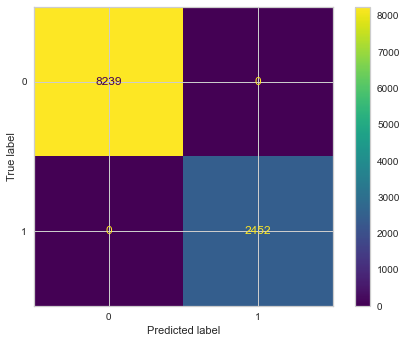

In [71]:
plot_confusion_matrix(ANN, X_test, y_test_pred_ANN)

In [73]:
print(classification_report(y_test, y_test_pred_ANN, target_names=['0','1'], digits=4))

              precision    recall  f1-score   support

           0     0.9950    0.8154    0.8963     10054
           1     0.2431    0.9356    0.3859       637

    accuracy                         0.8226     10691
   macro avg     0.6190    0.8755    0.6411     10691
weighted avg     0.9502    0.8226    0.8659     10691



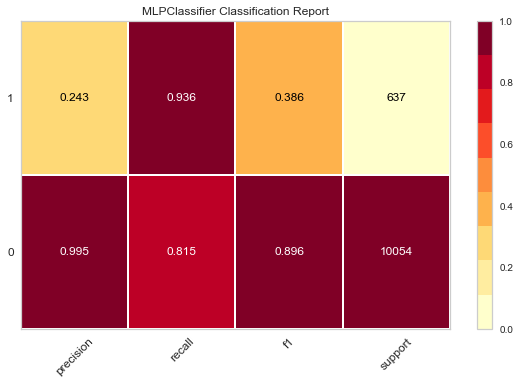

<AxesSubplot:title={'center':'MLPClassifier Classification Report'}>

In [75]:
visualizer = ClassificationReport(ANN, classes=['0','1'], support=True, is_fitted=True)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

> # Comparison

### 1. KNN (K-Nearest Neighbors)

In [8]:
from sklearn import neighbors

print("KNN Score:")
KNNClassifier = neighbors.KNeighborsClassifier(n_neighbors=2, weights='distance')
KNNClassifier.fit(X=X_train, y=y_train)
KNNClassifier.score(X_test, y_test)

KNN Score:


0.7160714285714286

In [9]:
KNN_y_predicted = KNNClassifier.predict(X_test)
class_names = np.unique(np.array(y_test))
confusion_matrix(y_test, KNN_y_predicted)

array([[1552,  557],
       [  79,   52]])

In [10]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

print(classification_report(y_test, KNN_y_predicted))

scores = cross_val_score(KNNClassifier, X_train, y_train, cv=10, scoring='accuracy')
knn_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % knn_accuracy)

              precision    recall  f1-score   support

           0       0.95      0.74      0.83      2109
           1       0.09      0.40      0.14       131

    accuracy                           0.72      2240
   macro avg       0.52      0.57      0.49      2240
weighted avg       0.90      0.72      0.79      2240

Cross-Validated Accuracy: 0.99


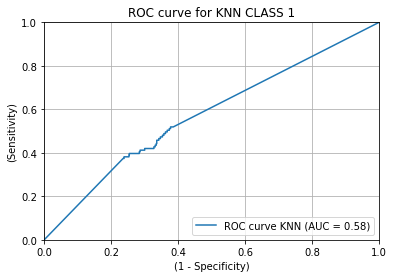

In [11]:
from sklearn.metrics import roc_curve, auc
knn_pred_prob = KNNClassifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, knn_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve KNN (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for KNN CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

### 2. Decision Tree

In [12]:
from sklearn import tree

DTClassifier = tree.DecisionTreeClassifier()
DTClassifier.fit(X_train, y_train) 

print("Decision Tree Score:")
DTClassifier.score(X_test, y_test)

Decision Tree Score :


0.7508928571428571

In [13]:
DT_y_predicted = DTClassifier.predict(X_test)
class_names = np.unique(np.array(y_test))
confusion_matrix(y_test, DT_y_predicted)

array([[1606,  503],
       [  55,   76]])

In [14]:
print(classification_report(y_test, DT_y_predicted))

scores = cross_val_score(DTClassifier, X_train, y_train, cv=10, scoring='accuracy')
dt_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % dt_accuracy)

              precision    recall  f1-score   support

           0       0.97      0.76      0.85      2109
           1       0.13      0.58      0.21       131

    accuracy                           0.75      2240
   macro avg       0.55      0.67      0.53      2240
weighted avg       0.92      0.75      0.81      2240

Cross-Validated Accuracy: 0.94


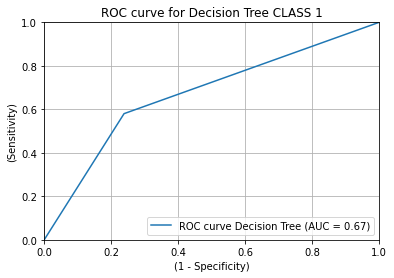

In [15]:
from sklearn.metrics import roc_curve, auc
dt_pred_prob = DTClassifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, dt_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve Decision Tree (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for Decision Tree CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

### 3. SVC (Support Vector Classification)

In [16]:
from sklearn.svm import SVC

SVMClassifier = SVC(kernel='rbf', probability=True, random_state=42, gamma='auto') 
SVMClassifier.fit(X_train, y_train) 
print("SVM Score:")
SVMClassifier.score(X_test, y_test)

SVM Score :


0.7919642857142857

In [17]:
SVM_y_predicted = SVMClassifier.predict(X_test)
class_names = np.unique(np.array(y_test))
confusion_matrix(y_test, SVM_y_predicted)

array([[1709,  400],
       [  66,   65]])

In [18]:
from sklearn.metrics import classification_report
report = classification_report(y_test, SVM_y_predicted)
print(report)

scores = cross_val_score(SVMClassifier, X_train, y_train, cv=10, scoring='accuracy')
svm_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % svm_accuracy)

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      2109
           1       0.14      0.50      0.22       131

    accuracy                           0.79      2240
   macro avg       0.55      0.65      0.55      2240
weighted avg       0.91      0.79      0.84      2240

Cross-Validated Accuracy: 0.96


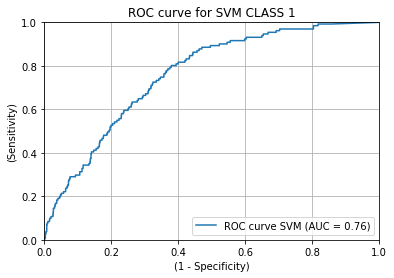

In [19]:
svm_pred_prob = SVMClassifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, svm_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve SVM (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for SVM CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

### 4. Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

RFClassifier = RandomForestClassifier()
RFClassifier.fit(X_train, y_train) 
print("Random Forest Score:")
RFClassifier.score(X_test, y_test)

Random Forest Score:


0.8642857142857143

In [21]:
RF_y_predicted = RFClassifier.predict(X_test)
class_names = np.unique(np.array(y_test))
confusion_matrix(y_test, RF_y_predicted)

array([[1887,  222],
       [  82,   49]])

In [22]:
from sklearn.metrics import classification_report
report = classification_report(y_test, RF_y_predicted)
print(report)

scores = cross_val_score(RFClassifier, X_train, y_train, cv=10, scoring='accuracy')
rf_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % rf_accuracy)

              precision    recall  f1-score   support

           0       0.96      0.89      0.93      2109
           1       0.18      0.37      0.24       131

    accuracy                           0.86      2240
   macro avg       0.57      0.63      0.58      2240
weighted avg       0.91      0.86      0.89      2240

Cross-Validated Accuracy: 0.97


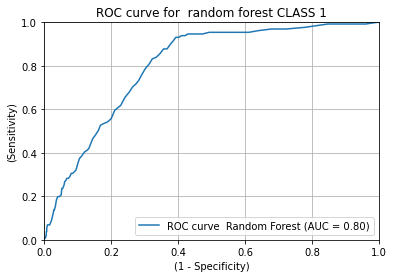

In [23]:
from sklearn.metrics import roc_curve, auc
rf_pred_prob = RFClassifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, rf_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve  Random Forest (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for  random forest CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

### 5. Balanced Random Forest

In [26]:
#pip install imbalanced-learn
from imblearn.ensemble import BalancedRandomForestClassifier

BRFClassifier = BalancedRandomForestClassifier()
BRFClassifier.fit(X_train, y_train) 
print("Balanced Random Forest Score:")
BRFClassifier.score(X_test, y_test)

Balanced Random Forest Score:


0.8714285714285714

In [27]:
BRF_y_predicted = BRFClassifier.predict(X_test)
report = classification_report(y_test, BRF_y_predicted)
print(report)

scores = cross_val_score(BRFClassifier, X_train, y_train, cv=10, scoring='accuracy')
brf_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % brf_accuracy)

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      2109
           1       0.18      0.34      0.23       131

    accuracy                           0.87      2240
   macro avg       0.57      0.62      0.58      2240
weighted avg       0.91      0.87      0.89      2240

Cross-Validated Accuracy: 0.97


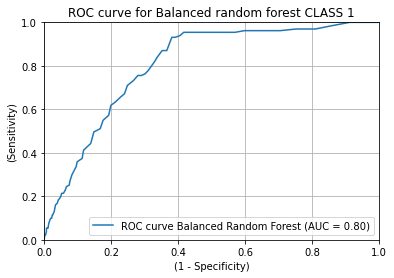

In [28]:
brf_pred_prob = BRFClassifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, brf_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve Balanced Random Forest (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for Balanced random forest CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

### 6. LDA (Linear Discriminant Analysis)

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
lda.fit(X_train, y_train) 
print("Linear Discriminant Analysis Score:")
lda.score(X_test, y_test)

Linear Discriminant Analysis Score:


0.6120535714285714

In [30]:
lda_y_predicted = lda.predict(X_test)
report = classification_report(y_test, lda_y_predicted)
print(report)

scores = cross_val_score(lda, X_train, y_train, cv=10, scoring='accuracy')
lda_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % lda_accuracy)

              precision    recall  f1-score   support

           0       0.99      0.59      0.74      2109
           1       0.13      0.95      0.22       131

    accuracy                           0.61      2240
   macro avg       0.56      0.77      0.48      2240
weighted avg       0.94      0.61      0.71      2240

Cross-Validated Accuracy: 0.84


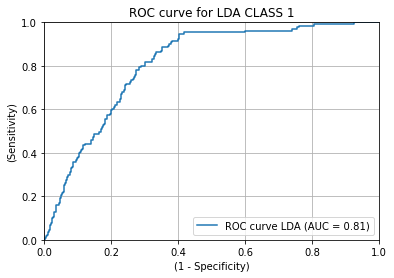

In [31]:
lda_pred_prob = lda.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, lda_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve LDA (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for LDA CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

### 7. Naive Bayes Classifier

In [32]:
from sklearn.naive_bayes import BernoulliNB

NBClassifier = BernoulliNB()
NBClassifier.fit(X_train, y_train)
print("Naive Bayes Classifier Score:")
NBClassifier.score(X_test, y_test)

Naive Bayes Classifier Score:


0.6075892857142857

In [33]:
nb_y_predicted = NBClassifier.predict(X_test)
report = classification_report(y_test, nb_y_predicted)
print(report)

scores = cross_val_score(NBClassifier, X_train, y_train, cv=10, scoring='accuracy')
nb_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % nb_accuracy)

              precision    recall  f1-score   support

           0       0.97      0.60      0.74      2109
           1       0.10      0.73      0.18       131

    accuracy                           0.61      2240
   macro avg       0.54      0.67      0.46      2240
weighted avg       0.92      0.61      0.71      2240

Cross-Validated Accuracy: 0.77


### 8. XGBOOST Classifier

In [34]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train, verbose=False) 
print("XGBClassifier Score:")
model_xgb.score(X_test, y_test)

XGBClassifier Score:


0.665625

In [35]:
xgboost_y_predicted = model_xgb.predict(X_test)
report = classification_report(y_test, xgboost_y_predicted)
print(report)

scores = cross_val_score(model_xgb, X_train, y_train, cv=10, scoring='accuracy')
xgb_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % xgb_accuracy)

              precision    recall  f1-score   support

           0       0.98      0.66      0.79      2109
           1       0.13      0.82      0.22       131

    accuracy                           0.67      2240
   macro avg       0.56      0.74      0.50      2240
weighted avg       0.93      0.67      0.75      2240

Cross-Validated Accuracy: 0.95


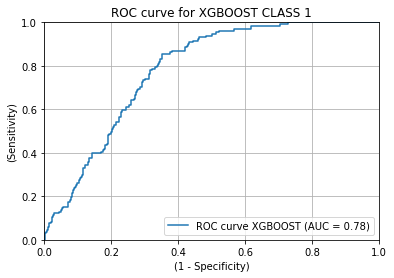

In [36]:
xgb_pred_prob = model_xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, xgb_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve XGBOOST (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for XGBOOST CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

### 9. Newral Network Classifier

In [37]:
from sklearn.neural_network import MLPClassifier

clf_MLP = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(19,19))
clf_MLP.fit(X_train, y_train) 
print("MLPClassifier Score:")
clf_MLP.score(X_test, y_test)

MLPClassifier Score:


0.7816964285714286

In [38]:
mlp_y_predicted = clf_MLP.predict(X_test)
report = classification_report(y_test, mlp_y_predicted)
print(report)

scores = cross_val_score(clf_MLP, X_train, y_train, cv=10, scoring='accuracy')
mlp_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % mlp_accuracy)

              precision    recall  f1-score   support

           0       0.97      0.80      0.87      2109
           1       0.15      0.56      0.23       131

    accuracy                           0.78      2240
   macro avg       0.56      0.68      0.55      2240
weighted avg       0.92      0.78      0.84      2240



/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multi

Cross-Validated Accuracy: 0.93


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Comparing 8 models:

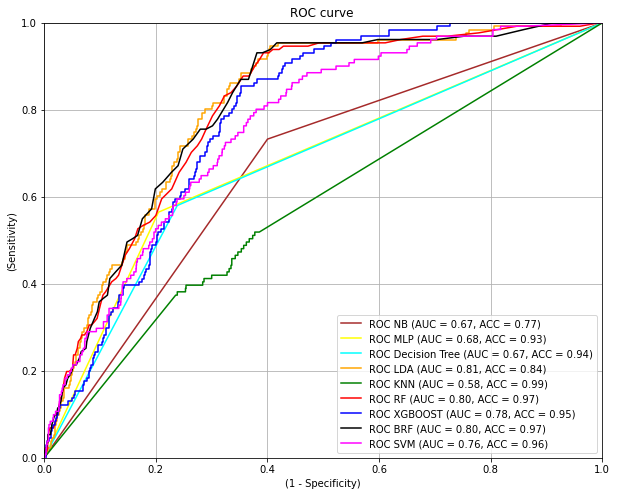

In [39]:
fpr9, tpr9, thresholds9 = roc_curve(y_test, nb_y_predicted)
roc_auc9 = auc(fpr9, tpr9)

fpr8, tpr8, thresholds8 = roc_curve(y_test, mlp_y_predicted)
roc_auc8 = auc(fpr8, tpr8)

fpr7, tpr7, thresholds7 = roc_curve(y_test, DT_y_predicted)
roc_auc7 = auc(fpr7, tpr7)

fpr6, tpr6, thresholds6 = roc_curve(y_test, lda_pred_prob)
roc_auc6 = auc(fpr6, tpr6)

fpr5, tpr5, thresholds5 = roc_curve(y_test, knn_pred_prob)
roc_auc5 = auc(fpr5, tpr5)

fpr4, tpr4, thresholds4 = roc_curve(y_test, rf_pred_prob)
roc_auc4 = auc(fpr4, tpr4)

fpr3, tpr3, thresholds3 = roc_curve(y_test, xgb_pred_prob)
roc_auc3 = auc(fpr3, tpr3)

fpr2, tpr2, thresholds2 = roc_curve(y_test, brf_pred_prob)
roc_auc2 = auc(fpr2, tpr2)

fpr1, tpr1, thresholds1 = roc_curve(y_test,svm_pred_prob)
roc_auc1 = auc(fpr1, tpr1)
lw = 2
plt.figure(figsize=(10, 8))
plt.plot(fpr9, tpr9,color='brown',label='ROC NB (AUC = %0.2f, ACC = %0.2f)' % (roc_auc9, nb_accuracy))
plt.plot(fpr8, tpr8,color='yellow',label='ROC MLP (AUC = %0.2f, ACC = %0.2f)' % (roc_auc8, mlp_accuracy))
plt.plot(fpr7, tpr7,color='cyan',label='ROC Decision Tree (AUC = %0.2f, ACC = %0.2f)' % (roc_auc7, dt_accuracy))
plt.plot(fpr6, tpr6,color='orange',label='ROC LDA (AUC = %0.2f, ACC = %0.2f)' % (roc_auc6, lda_accuracy))
plt.plot(fpr5, tpr5,color='green',label='ROC KNN (AUC = %0.2f, ACC = %0.2f)' % (roc_auc5, knn_accuracy))
plt.plot(fpr4, tpr4,color='red',label='ROC RF (AUC = %0.2f, ACC = %0.2f)' % (roc_auc4, rf_accuracy))
plt.plot(fpr3, tpr3,color='blue',label='ROC XGBOOST (AUC = %0.2f, ACC = %0.2f)' % (roc_auc3, xgb_accuracy))
plt.plot(fpr2, tpr2,color='black',label='ROC BRF (AUC = %0.2f, ACC = %0.2f)' % (roc_auc2, brf_accuracy))
plt.plot(fpr1, tpr1,color='magenta',label='ROC SVM (AUC = %0.2f, ACC = %0.2f)' % (roc_auc1, svm_accuracy))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve ')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

**Conclusion:**  
The predictive power of each model expressed by ROC curves. For instance, Linear Discriminant Analysis, Balanced Random Forest, and Random Forest model have higher probability of accurate prediction of correct class member, and gaining high level of accuracy prediction probability as compared to KNN, Decision Tree, SVC, Naive Bayes Classifier, XGBOOST Classifier, and Newral Network Classifier models.

In [40]:
# Balanced Random Forest model has better ROC Curve and Cross-validated accuracy, plot feature importance
def rf_feat_importance(m, df):
    return pd.DataFrame({'feature':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
def plot_fi(fi): 
    return fi.plot('feature', 'imp', 'barh', figsize=(15,7), legend=False)

fi = rf_feat_importance(BRFClassifier, X_train); fi[:15]

,feature,imp
30,BasePolicy,0.153929
17,Fault,0.110675
18,PolicyType,0.106956
19,VehicleCategory,0.056884
23,PastNumberOfClaims,0.044565
2,MonthClaimed,0.041847
1,WeekOfMonthOfAccident,0.041479
10,Year,0.036037
7,DriverRating,0.034381
0,MonthOfAccident,0.034073


<AxesSubplot:ylabel='feature'>

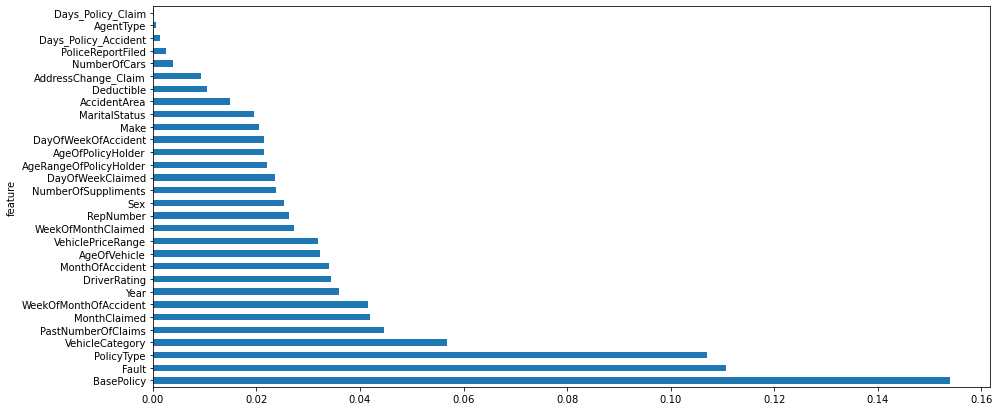

In [41]:
plot_fi(fi[:30])